### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [1]:
from scipy import stats
import numpy as np
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1
random_bad = [rng_bad() for _ in range(30000)]
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
random = [rng() for _ in range(30000)]
a=stats.kstest(random, stats.uniform.cdf)
b=stats.kstest(random_bad, stats.uniform.cdf)
print(a)
print(b)

KstestResult(statistic=0.005309841797252524, pvalue=0.3648538790388741, statistic_location=0.29232349153608084, statistic_sign=1)
KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354, statistic_location=0.41213701805099845, statistic_sign=-1)


### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

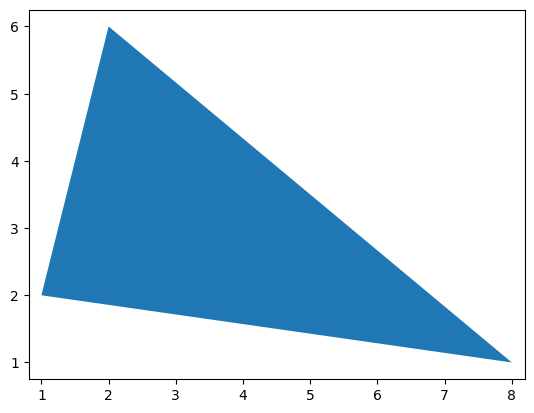

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

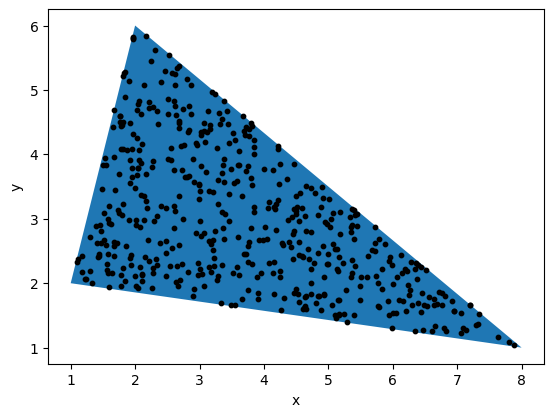

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
vertices = np.array([[1, 2], [2, 6], [8, 1]])
def generate_points_in_triangle(vertices, n_points):
    points = []
    for _ in range(n_points):
        u, v = np.random.rand(2)
        if u + v > 1:
            u, v = 1 - u, 1 - v
        point = (1 - u - v) * vertices[0] + u * vertices[1] + v * vertices[2]
        points.append(point)
    return np.array(points)
points = generate_points_in_triangle(vertices, 500)
fig, ax = plt.subplots()
polygon = Polygon(vertices, closed=True)
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=10, color='black')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

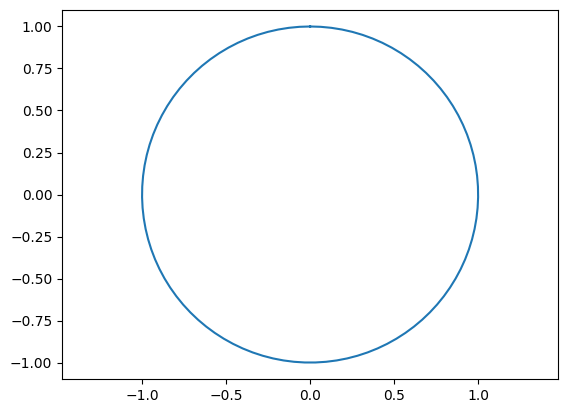

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

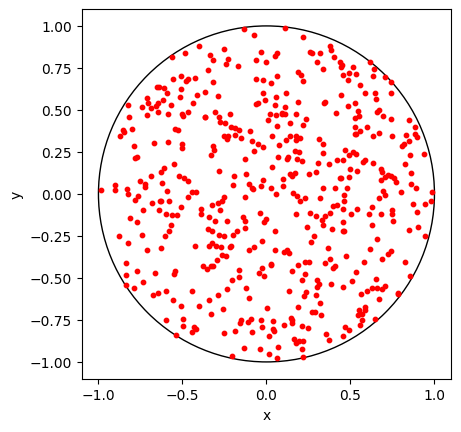

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def generate_points_in_circle(n_points):
    r = np.sqrt(np.random.uniform(0, 1, n_points))
    theta = np.random.uniform(0, 2 * np.pi, n_points)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y
x, y = generate_points_in_circle(500)
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.scatter(x, y, s=10, color='red')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

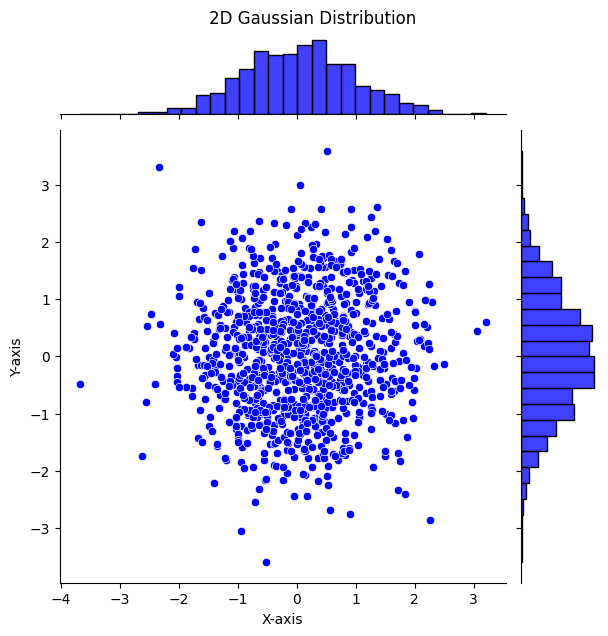

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

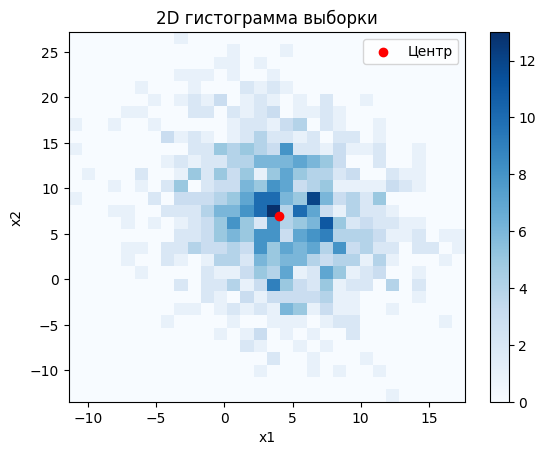

Выборочное среднее:
 [4.15862849 7.0485446 ]
Точное среднее:
 [4 7]
Выборочная ковариационная матрица:
 [[19.87703698 -5.59480586]
 [-5.59480586 39.84654032]]
Точная ковариационная матрица:
 [[20 -4]
 [-4 40]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
def box_muller_modified(n_samples):
    samples = []
    while len(samples) < n_samples:
        U1, U2 = np.random.uniform(-1, 1, 2)  # Генерация двух равномерных случайных величин
        S = U1**2 + U2**2
        if S < 1 and S > 0:  # Проверка, чтобы S была в (0, 1)
            Z1 = U1 * np.sqrt(-2 * np.log(S) / S)
            Z2 = U2 * np.sqrt(-2 * np.log(S) / S)
            samples.append((Z1, Z2))
    return np.array(samples)


mu = np.array([4, 7])
Sigma = np.array([[20, -4], [-4, 40]])
L = np.linalg.cholesky(Sigma)

# Генерация выборки из 2D нормального распределения
n_samples = 1000
Z = box_muller_modified(n_samples)
X = mu + Z @ L.T  # Преобразование в многомерное нормальное распределение
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='Blues')
plt.colorbar()
plt.scatter(mu[0], mu[1], color='red', label='Центр')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D гистограмма выборки')
plt.legend()
plt.show()
sample_mean = np.mean(X, axis=0)  # Выборочное среднее
sample_cov = np.cov(X, rowvar=False)  # Выборочная ковариационная матрица

print("Выборочное среднее:\n", sample_mean)
print("Точное среднее:\n", mu)
print("Выборочная ковариационная матрица:\n", sample_cov)
print("Точная ковариационная матрица:\n", Sigma)

* More randomness tests - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).
* More methods for generating a uniform value [here](https://en.wikipedia.org/wiki/List_of_random_number_generators).
* A story about dynamical systems and the transition to chaos https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be